### **The food delivery time prediction model plays a crucial role in the food delivery industry, where timely and accurate deliveries are critical for customer satisfaction and overall experience.**

### **To create an effective prediction model, we meticulously cleaned the dataset to eliminate errors and inconsistencies, ensuring the reliability and accuracy of the predictions.**

### **Next, we employed feature engineering to derive valuable insights from the dataset. By considering factors such as the delivery person's age, rating, location coordinates, and time-related variables, we aimed to identify the key elements influencing delivery time. These engineered features significantly enhanced the model's predictive power.**

### **We then built the predictive model using regression algorithms, including Linear Regression, Decision Tree, Random Forest, and XGBoost. The model was trained on a subset of the dataset using cross-validation techniques to ensure robustness. The model's performance was evaluated using metrics such as Mean Squared Error (MSE) and R² score.**

### **This food delivery time prediction model enables businesses to optimize their operations and enhance the overall delivery experience for their customers.**


# Import Libraries

In [1153]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import statistics
from geopy.distance import geodesic

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import xgboost as xgb

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

# Load And Understanding

In [1155]:
df_train = pd.read_csv('train.csv')

In [1156]:
df_train

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,conditions Windy,High,1,Meal,motorcycle,0,No,Metropolitian,(min) 32
45589,0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,conditions Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 36
45590,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,(min) 16
45591,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,conditions Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,(min) 26


In [1157]:
df_train.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken(min)'],
      dtype='object')

In [1158]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [1159]:
#checking statistical value for field with numerical datatype

In [1160]:
df_train.describe()

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition
count,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000
mean,17.017729,70.231332,17.465186,70.845702,1.023359
std,8.185109,22.883647,7.335122,21.118812,0.839065
min,-30.905562,-88.366217,0.010000,0.010000,0.000000
25%,12.933284,73.170000,12.988453,73.280000,0.000000
50%,18.546947,75.898497,18.633934,76.002574,1.000000
75%,22.728163,78.044095,22.785049,78.107044,2.000000
max,30.914057,88.433452,31.054057,88.563452,3.000000


In [1161]:
# check statistical value for fields with other than numerical datatype

In [1162]:
df_train.describe(exclude = np.number).T

,count,unique,top,freq
ID,45593,45593,0x4607,1
Delivery_person_ID,45593,1320,PUNERES01DEL01,67
Delivery_person_Age,45593,23,35,2262
Delivery_person_Ratings,45593,29,4.8,7148
Order_Date,45593,44,15-03-2022,1192
Time_Orderd,45593,177,NaN,1731
Time_Order_picked,45593,193,21:30:00,496
Weatherconditions,45593,7,conditions Fog,7654
Road_traffic_density,45593,5,Low,15477
Type_of_order,45593,4,Snack,11533


### Observation

    1. There are null value in Time_Orderd Column
    2. Date Formating will be required for Weatherconditions and Time_take(min)
    3. Both numerical and categorical feature are present
    4. ID and Delivery_person_ID will not be used to build the model
    

# Data Cleaning

In [1165]:
# updates the column
def update_column_name(df):
    df.rename(columns = {'Weatherconditions' : 'weather_conditions'}, inplace=True)
    return None

update_column_name(df_train)
print(df_train.columns)

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken(min)'],
      dtype='object')


In [1166]:
# Extract the relevant values from column
def extract_column_value(df):
    # Extract time and convert to int
    df['Time_taken(min)'] = df['Time_taken(min)'].apply(lambda x: int(x.split(' ')[1].strip()))

    # Extract Weather conditions
    df['weather_conditions'] = df['weather_conditions'].apply(lambda x: x.split(' ')[1].strip())

    # Extract City code from Delivery_person_ID
    df['City_code'] = df['Delivery_person_ID'].str.split('RES', expand = True)[0]
    # df_train['Delivery_person_ID'].str.extract(r'(.+?)RES')--- Alternative
    

In [1167]:
extract_column_value(df_train)

In [1168]:
df_train[['Time_taken(min)', 'weather_conditions', 'City_code']]

,Time_taken(min),weather_conditions,City_code
0,24,Sunny,INDO
1,33,Stormy,BANG
2,26,Sandstorms,BANG
3,21,Sunny,COIMB
4,30,Cloudy,CHEN
...,...,...,...
45588,32,Windy,JAP
45589,36,Windy,AGR
45590,16,Cloudy,CHEN
45591,26,Cloudy,COIMB


In [1169]:
# Droping the columns which are not in use
def drop_columns(df):
    df.drop(['ID', 'Delivery_person_ID'], axis = 1, inplace = True)

print('Before No of Columns:', df_train.shape[1])
drop_columns(df_train)
print('After No of Columns:', df_train.shape[1])

Before No of Columns: 21
After No of Columns: 19


In [1170]:
# Check for duplicates
if (len(df_train[df_train.duplicated])>0):
    print('There are duplicate value are present')

else:
    print('There are no duplicates')

There are no duplicates


In [1171]:
# Update DataType
def update_datatype(df):
    df['Delivery_person_Age'] = df['Delivery_person_Age'].astype('float64')
    df['Delivery_person_Ratings'] = df['Delivery_person_Ratings'].astype('float64')
    df['multiple_deliveries'] = df['multiple_deliveries'].astype('float64')

    df['Order_Date'] = pd.to_datetime(df['Order_Date'], format = '%d-%m-%Y')

update_datatype(df_train)

In [1172]:
#Converting String NaN to np.nan
def convert_nan(df):
    df.replace('NaN', float(np.nan), regex = True, inplace = True)

convert_nan(df_train)

In [1173]:
# checking the null value
df_train.isnull().sum().sort_values(ascending = False)

Delivery_person_Ratings        1908
Delivery_person_Age            1854
Time_Orderd                    1731
City                           1200
multiple_deliveries             993
weather_conditions              616
Road_traffic_density            601
Festival                        228
Order_Date                        0
Delivery_location_longitude       0
Time_Order_picked                 0
Delivery_location_latitude        0
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
Restaurant_longitude              0
Restaurant_latitude               0
Time_taken(min)                   0
City_code                         0
dtype: int64

In [1174]:
# Let explore the columns which has null values

In [1175]:
cols = ['Delivery_person_Ratings', 'Delivery_person_Age' , 'City', 'multiple_deliveries', 'weather_conditions'
, 'Road_traffic_density', 'Festival']        

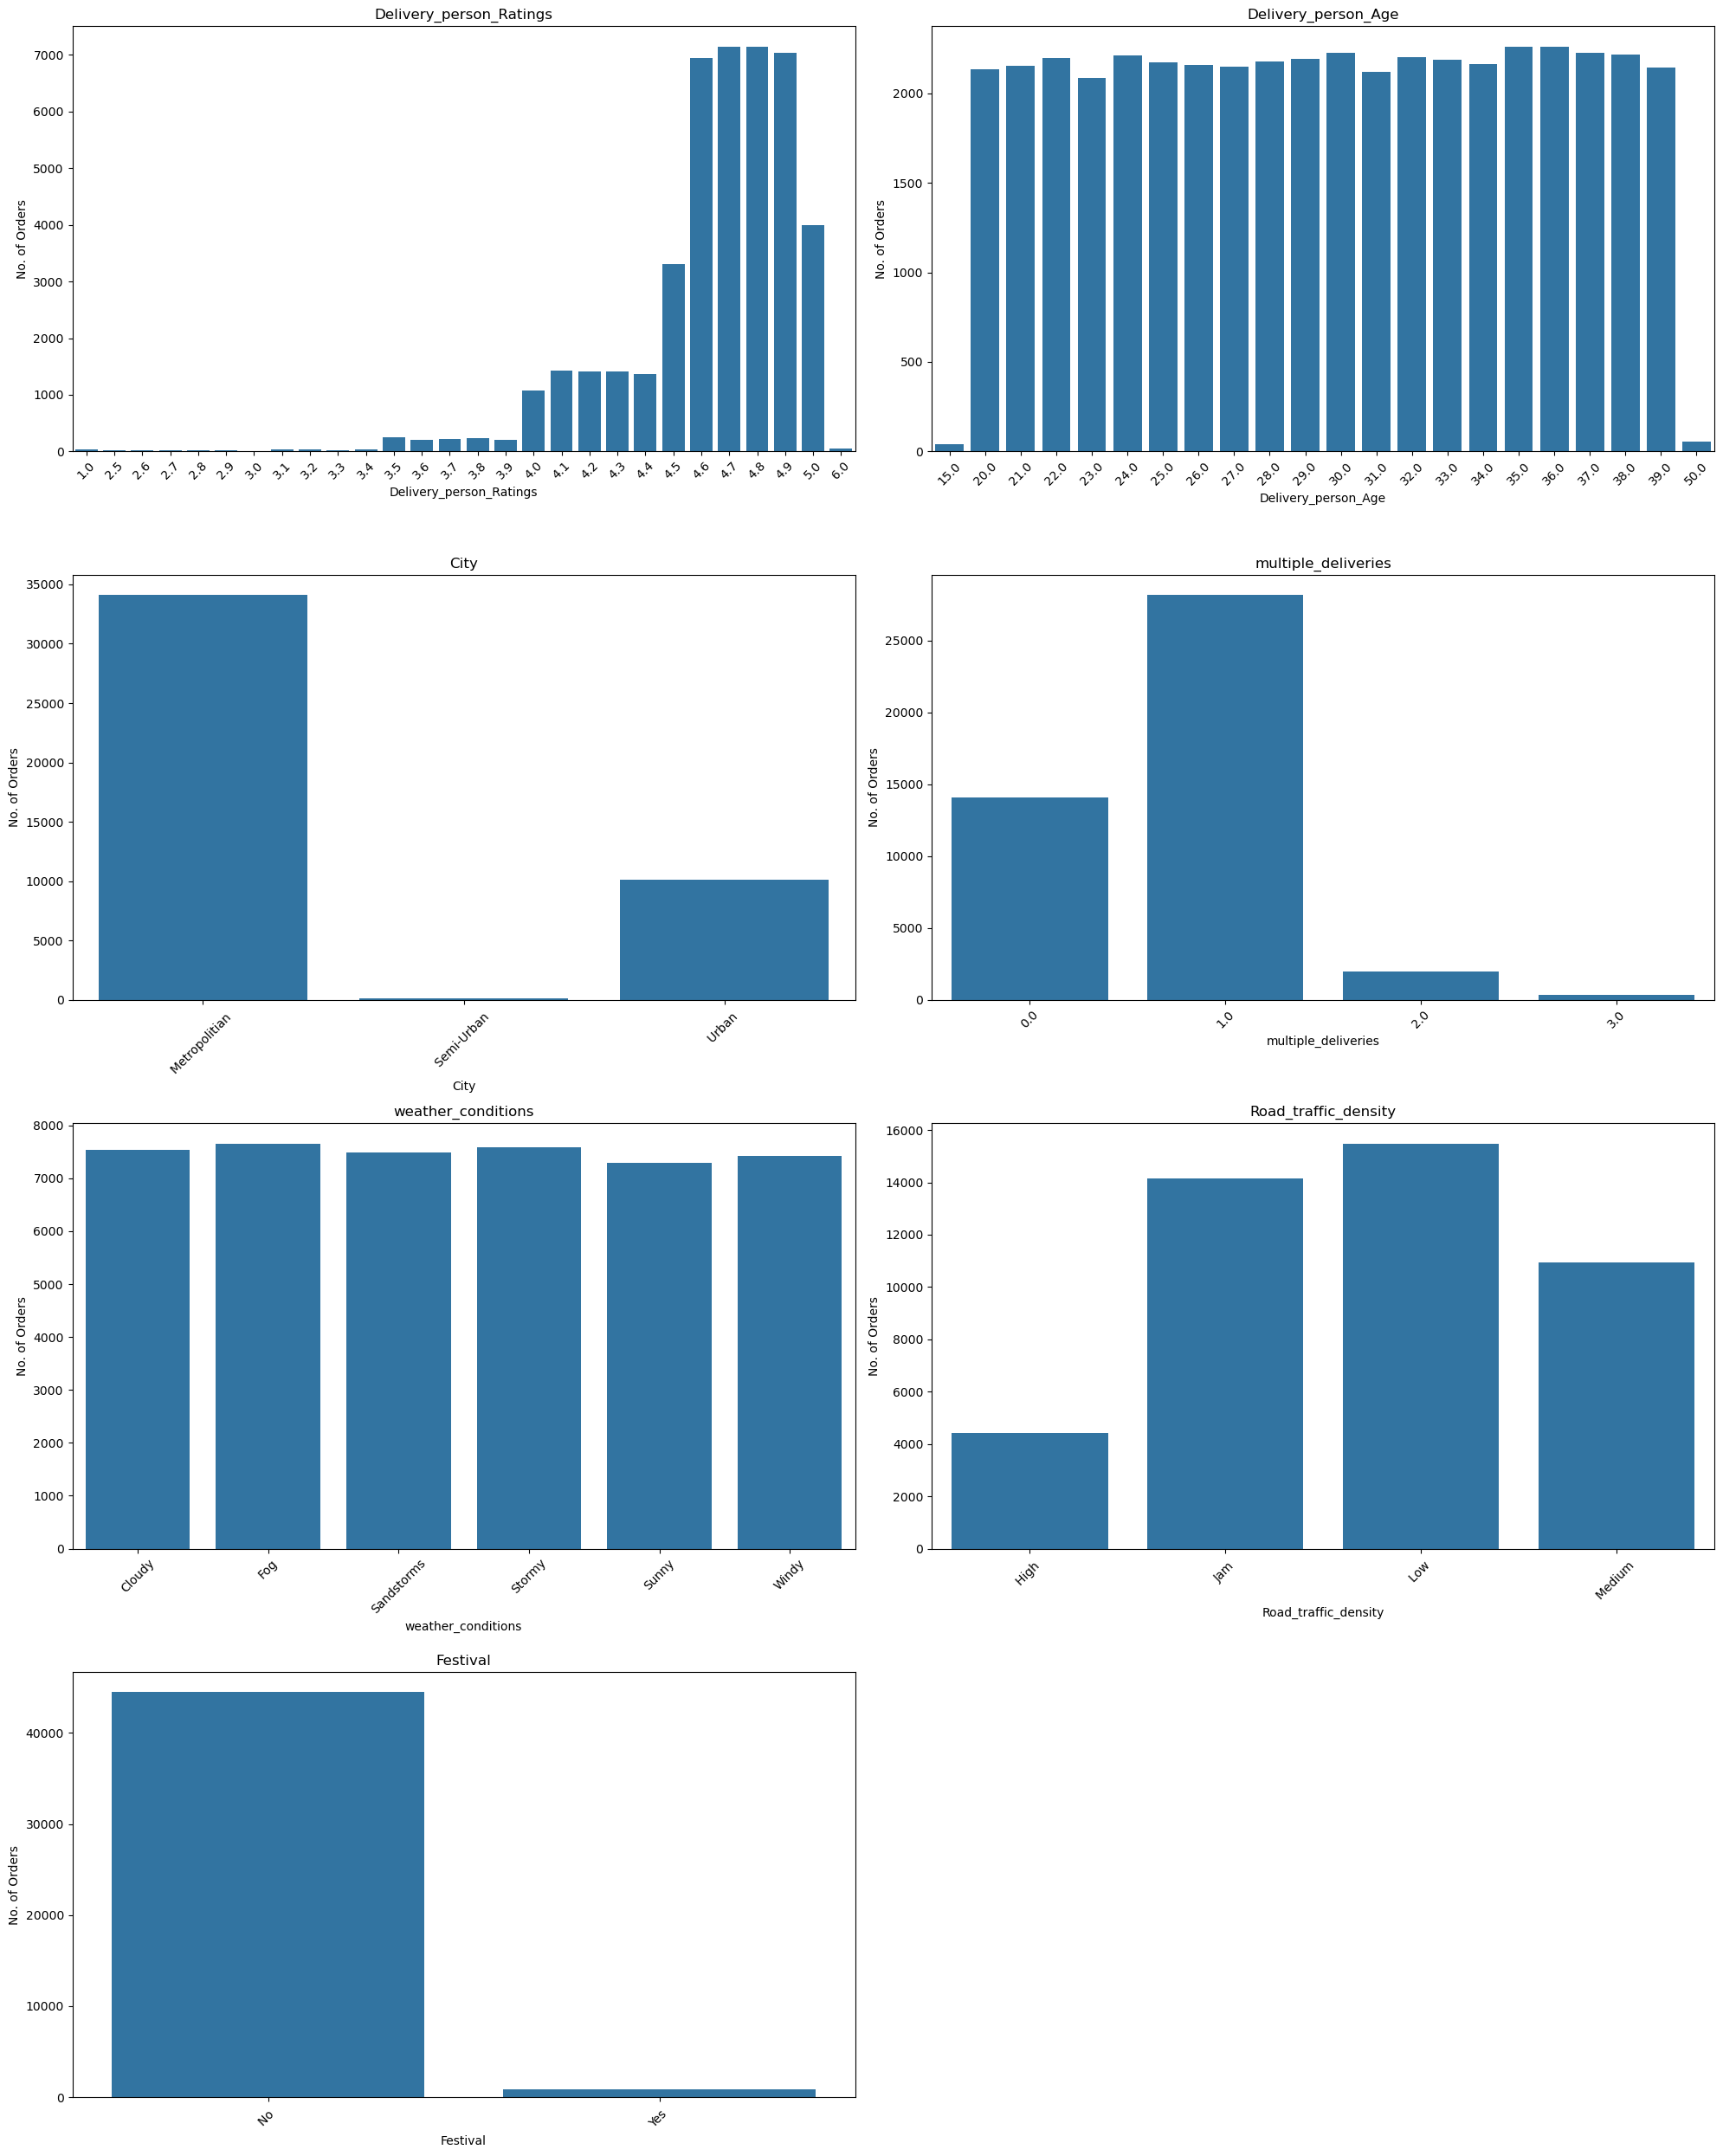

In [1176]:
num_plots = len(cols)
num_rows = (num_plots // 2) + (num_plots % 2)

fig, axes = plt.subplots(num_rows, 2 , figsize = (20,25))

for i, column_name in enumerate(cols):
    row = i//2
    col = i % 2
    ax = axes[row,col]
    sns.countplot(data= df_train, x = column_name, order = df_train[column_name].value_counts().sort_index().index,ax = ax)
    ax.set_xlabel(column_name)
    ax.set_ylabel('No. of Orders')
    ax.set_title(column_name)
    ax.tick_params(axis = 'x', rotation=45)

if num_plots % 2 != 0:
    fig.delaxes(axes[-1, -1])

plt.tight_layout()
plt.show()

In [1177]:
# handleing the null values

In [1178]:
def handling_null_values(df):
    
    df['Delivery_person_Age'].fillna(np.random.choice(df['Delivery_person_Age']), inplace = True)
    df['weather_conditions'].fillna(np.random.choice(df['weather_conditions']), inplace = True)
    df['City'].fillna(df['City'].mode()[0], inplace = True)
    df['Festival'].fillna(df['Festival'].mode()[0], inplace = True)
    df['Road_traffic_density'].fillna(df['Road_traffic_density'].mode()[0], inplace = True)
    df['multiple_deliveries'].fillna(df['multiple_deliveries'].mode()[0], inplace = True)
    df['Delivery_person_Ratings'].fillna(df['Delivery_person_Ratings'].mode()[0], inplace = True)

handling_null_values(df_train)

In [1179]:
df_train.isnull().sum()

Delivery_person_Age               0
Delivery_person_Ratings           0
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
weather_conditions                0
Road_traffic_density              0
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries               0
Festival                          0
City                              0
Time_taken(min)                   0
City_code                         0
dtype: int64

# Feature Engineering

In [1181]:
def extract_date_features(date):
    date['day'] = date.Order_Date.dt.day
    date['month'] = date.Order_Date.dt.month
    date['quater']= date.Order_Date.dt.quarter
    date['year'] = date.Order_Date.dt.year
    date['day_of_week'] = date.Order_Date.dt.day_of_week.astype(int)
    date['is_month_start'] = date.Order_Date.dt.is_month_start.astype(int)
    date['is_month_end'] = date.Order_Date.dt.is_month_end.astype(int)
    date['is_quater_start'] = date.Order_Date.dt.is_quarter_start.astype(int)
    date['is_quater_end'] = date.Order_Date.dt.is_quarter_end.astype(int)
    date['is_year_start'] = date.Order_Date.dt.is_year_start.astype(int)
    date['is_year_end'] = date.Order_Date.dt.is_year_end.astype(int)
    date['is_weekend'] = np.where(date['day_of_week'].isin([5,6]),1,0)

extract_date_features(df_train)
df_train.head(10)

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,weather_conditions,...,quater,year,day_of_week,is_month_start,is_month_end,is_quater_start,is_quater_end,is_year_start,is_year_end,is_weekend
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,...,1,2022,5,0,0,0,0,0,0,1
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,...,1,2022,4,0,0,0,0,0,0,0
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,...,1,2022,5,0,0,0,0,0,0,1
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,...,2,2022,1,0,0,0,0,0,0,0
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,...,1,2022,5,0,0,0,0,0,0,1
5,22.0,4.8,17.431668,78.408321,17.461668,78.438321,2022-03-11,21:20:00,21:30:00,Cloudy,...,1,2022,4,0,0,0,0,0,0,0
6,33.0,4.7,23.369746,85.339820,23.479746,85.449820,2022-03-04,19:15:00,19:30:00,Fog,...,1,2022,4,0,0,0,0,0,0,0
7,35.0,4.6,12.352058,76.606650,12.482058,76.736650,2022-03-14,17:25:00,17:30:00,Cloudy,...,1,2022,0,0,0,0,0,0,0,0
8,22.0,4.8,17.433809,78.386744,17.563809,78.516744,2022-03-20,20:55:00,21:05:00,Stormy,...,1,2022,6,0,0,0,0,0,0,1
9,36.0,4.2,30.327968,78.046106,30.397968,78.116106,2022-02-12,21:55:00,22:10:00,Fog,...,1,2022,5,0,0,0,0,0,0,1


In [1182]:
# calculating the time difference
def calculate_time_diff(df):
    df['Time_Orderd'] = pd.to_timedelta(df['Time_Orderd'])
    
    df['Time_Order_picked'] = pd.to_timedelta(df['Time_Order_picked'])
    
    df['Time_Order_Picked_Formatted'] = (df['Order_Date'] + np.where(df['Time_Order_picked'] < df['Time_Orderd'],
                                                                    pd.DateOffset(days=1),
                                                                    pd.DateOffset(days=0)) + df['Time_Order_picked'])
    
    df['Time_Orderd_Formatted'] = df['Order_Date'] + df['Time_Orderd']
    
    df['Time_Order_Picked_Formatted'] = pd.to_datetime(df['Time_Order_Picked_Formatted'])

    df['Order_Prepration_Time'] = (df['Time_Order_Picked_Formatted'] - df['Time_Orderd_Formatted']).dt.total_seconds() / 60

    # filling the null value with median
    df['Order_Prepration_Time'].fillna(df['Order_Prepration_Time'].median(), inplace = True)

    # Drop all time and related columns
    df.drop(['Time_Orderd', 'Time_Order_picked', 'Time_Orderd_Formatted','Time_Order_Picked_Formatted', 'Order_Date'], axis = 1, inplace= True)


calculate_time_diff(df_train)

                                                                                            

In [1183]:
df_train

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,...,year,day_of_week,is_month_start,is_month_end,is_quater_start,is_quater_end,is_year_start,is_year_end,is_weekend,Order_Prepration_Time
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,Sunny,High,2,Snack,...,2022,5,0,0,0,0,0,0,1,15.0
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,Stormy,Jam,2,Snack,...,2022,4,0,0,0,0,0,0,0,5.0
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Sandstorms,Low,0,Drinks,...,2022,5,0,0,0,0,0,0,1,15.0
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Sunny,Medium,0,Buffet,...,2022,1,0,0,0,0,0,0,0,10.0
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Cloudy,High,1,Snack,...,2022,5,0,0,0,0,0,0,1,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,30.0,4.8,26.902328,75.794257,26.912328,75.804257,Windy,High,1,Meal,...,2022,3,0,0,0,0,0,0,0,10.0
45589,21.0,4.6,0.000000,0.000000,0.070000,0.070000,Windy,Jam,0,Buffet,...,2022,2,0,0,0,0,0,0,0,15.0
45590,30.0,4.9,13.022394,80.242439,13.052394,80.272439,Cloudy,Low,1,Drinks,...,2022,4,0,0,0,0,0,0,0,15.0
45591,20.0,4.7,11.001753,76.986241,11.041753,77.026241,Cloudy,High,0,Snack,...,2022,0,0,0,0,0,0,0,0,5.0


In [1184]:
# calculate the distance between rasturant location and delivery location

In [1185]:
def calculate_distance(df):
    df['distance'] = np.zeros(len(df))
    restaurant_coordinate = df[['Restaurant_latitude', 'Restaurant_longitude']].to_numpy()
    delivery_location_coordinate = df[['Delivery_location_latitude', 'Delivery_location_longitude']].to_numpy()
    df['distance'] = np.array([geodesic(resturant, delivery) for resturant, delivery in zip(restaurant_coordinate,delivery_location_coordinate)])
    df['distance'] = df['distance'].astype('str').str.extract(r'(\d{1,})\.').astype('int64')

calculate_distance(df_train)   

In [1186]:
df_train

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,...,day_of_week,is_month_start,is_month_end,is_quater_start,is_quater_end,is_year_start,is_year_end,is_weekend,Order_Prepration_Time,distance
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,Sunny,High,2,Snack,...,5,0,0,0,0,0,0,1,15.0,3
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,Stormy,Jam,2,Snack,...,4,0,0,0,0,0,0,0,5.0,20
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Sandstorms,Low,0,Drinks,...,5,0,0,0,0,0,0,1,15.0,1
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Sunny,Medium,0,Buffet,...,1,0,0,0,0,0,0,0,10.0,7
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Cloudy,High,1,Snack,...,5,0,0,0,0,0,0,1,15.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,30.0,4.8,26.902328,75.794257,26.912328,75.804257,Windy,High,1,Meal,...,3,0,0,0,0,0,0,0,10.0,1
45589,21.0,4.6,0.000000,0.000000,0.070000,0.070000,Windy,Jam,0,Buffet,...,2,0,0,0,0,0,0,0,15.0,10
45590,30.0,4.9,13.022394,80.242439,13.052394,80.272439,Cloudy,Low,1,Drinks,...,4,0,0,0,0,0,0,0,15.0,4
45591,20.0,4.7,11.001753,76.986241,11.041753,77.026241,Cloudy,High,0,Snack,...,0,0,0,0,0,0,0,0,5.0,6


# LabelEncoding

In [1188]:
def label_encoding(df):
    categorical_columns = df.select_dtypes(include = 'object').columns
    label_encoder = LabelEncoder()
    df[categorical_columns] = df[categorical_columns].apply(lambda col: label_encoder.fit_transform(col))

label_encoding(df_train)
df_train.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,...,day_of_week,is_month_start,is_month_end,is_quater_start,is_quater_end,is_year_start,is_year_end,is_weekend,Order_Prepration_Time,distance
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,4,0,2,3,...,5,0,0,0,0,0,0,1,15.0,3
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,3,1,2,3,...,4,0,0,0,0,0,0,0,5.0,20
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2,2,0,1,...,5,0,0,0,0,0,0,1,15.0,1
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,4,3,0,0,...,1,0,0,0,0,0,0,0,10.0,7
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,0,0,1,3,...,5,0,0,0,0,0,0,1,15.0,6


# Train Test Split

In [1190]:
# Split the Features and Labels
X = df_train.drop('Time_taken(min)', axis=1)
y = df_train['Time_taken(min)']

# Split the data into train and test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(36474, 29)
(9119, 29)
(36474,)
(9119,)


In [1191]:
X_train.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'City_code', 'day', 'month', 'quater', 'year', 'day_of_week',
       'is_month_start', 'is_month_end', 'is_quater_start', 'is_quater_end',
       'is_year_start', 'is_year_end', 'is_weekend', 'Order_Prepration_Time',
       'distance'],
      dtype='object')

# Standardization

In [1193]:
# Creat a StandardScaler object
scaler = StandardScaler()

# fit the scaler on the traning data
scaler.fit(X_train)

# Perform Standardization on traning data
X_train = scaler.transform(X_train)

# Perform Standardization on testing data
X_test = scaler.transform(X_test)

# Model Building

In [1195]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# finding the best model

models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    xgb.XGBRegressor(),
]

param_grid = [
    {},
    {'max_depth': [3, 5, 7]},
    {'n_estimators': [100, 200, 300]},
    {'n_estimators': [20, 25, 30], 'max_depth': [5, 7, 9]},

]

for i, model in enumerate(models):
    grid_search = GridSearchCV(model, param_grid[i], cv=5, scoring='r2')
    grid_search.fit(X_train, y_train)

    print(f'{model.__class__.__name__}:')
    print('Best Parameter:', grid_search.best_params_)
    print('Best Score:', grid_search.best_score_)
    print("====================================")
    

LinearRegression:
Best Parameter: {}
Best Score: 0.4236183963091834
DecisionTreeRegressor:
Best Parameter: {'max_depth': 7}
Best Score: 0.7318460698695576
RandomForestRegressor:
Best Parameter: {'n_estimators': 300}
Best Score: 0.8141053865710483
XGBRegressor:
Best Parameter: {'max_depth': 7, 'n_estimators': 25}
Best Score: 0.8199275507624794


# Model Building

In [1240]:
# creat XGB regressor model

model = xgb.XGBRegressor(n_estimators=25,max_depth=9)

# fit the model on traning data
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=25, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# Model Evaluvation

In [1245]:
# Make prediction on the test data
y_pred = model.predict(X_test)

In [1249]:
# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Square Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Square Error (RMSE):", rmse)
print("R2 Score(R2):", r2)



Mean Square Error (MSE): 15.95227991999125
Mean Absolute Error (MAE): 3.162564144203545
Root Mean Square Error (RMSE): 3.9940305356858814
R2 Score(R2): 0.8180586345107449


# Conclusion

### **In short XG Boost Performing very well with r2 score of 0.82**

In [1262]:
import pickle
# saving the model using pickle

xgbmodel = 'xgbmodel.pkl'

with open(xgbmodel, 'wb') as file:
    pickle.dump(model, file)

print(f'Model Saved to {xgbmodel}')


# saving the scaleing model
scaleing = 'scaler.pkl'

with open(scaleing,'wb') as file:
    pickle.dump(scaler, file)

print(f'Model Saved to {scaleing}')


Model Saved to xgbmodel.pkl
Model Saved to scaler.pkl
